# INPE Downloader

## Time Series

With the basic functions to open files and create cube, it is pretty straight forward to create a time series from these data. For that, we have another helper function, called `cut_cube_by_geoms` that receives a DataArray and GeoPandas GeoSeries. 

In [1]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd
import xarray as xr
from raindownloader.downloader import Downloader
from raindownloader.inpeparser import INPEParsers, INPETypes

In [2]:
# set the download folder
# download_folder = '../tmp'
download_folder = '/workspaces/reports_folder/downloads/'

In [3]:
downloader = Downloader(
    server=INPEParsers.FTPurl, 
    parsers=INPEParsers.parsers,
    local_folder=download_folder,
)


In [34]:
# Create a cube of monthly rain
cube = downloader.create_cube(
    start_date='2000-07',
    end_date='2023-05',
    datatype=INPETypes.MONTHLY_ACCUM_MANUAL
)

Can't create file '/workspaces/reports_folder/downloads/DAILY_RAIN/MERGE_CPTEC_20190201.grib2.923a8.idx'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/cfgrib/messages.py", line 273, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/cfgrib/messages.py", line 340, in message_from_file
    return Message.from_file(file, offset, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/cfgrib/messages.py", line 104, in from_file
    raise EOFError("End of file: %r" % file)
EOFError: End of file: <_io.BufferedReader name='/workspaces/reports_folder/downloads/DAILY_RAIN/MERGE_CPTEC_20190201.grib2'>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/cfgrib/messages.py", line 535, in from_indexpath_or_filestream
    self = cls.from_fieldset(filestream, index_keys, computed_keys)
  

EOFError: No valid message found: '/workspaces/reports_folder/downloads/DAILY_RAIN/MERGE_CPTEC_20190201.grib2'

In [17]:
cube

<xarray.DataArray 'monthacum' (time: 20, latitude: 924, longitude: 1001)>
array([[[ 44.9375,  95.9375, 102.125 , ...,   0.    ,   0.    ,
           0.    ],
        [ 99.5625,  94.125 ,  93.625 , ...,  90.8125,  87.4375,
          83.1875],
        [104.125 ,  98.9375,  92.375 , ...,  90.125 ,  87.8125,
          82.875 ],
        ...,
        [ 11.8125,  14.3125,  14.25  , ...,   1.    ,   0.875 ,
           1.3125],
        [ 11.5625,  14.6875,  17.    , ...,   2.5625,   1.9375,
           1.375 ],
        [ 43.25  ,  11.5   ,  12.3125, ...,   2.3125,   2.875 ,
           1.75  ]],

       [[ 36.0625,  89.6875,  91.75  , ...,  45.4375,  43.4375,
          43.3125],
        [ 88.3125,  85.875 ,  88.    , ..., 115.5625, 122.9375,
         127.125 ],
        [ 88.125 ,  86.1875,  85.375 , ..., 129.125 , 129.9375,
         130.375 ],
...
        [  1.3125,   1.5625,   1.4375, ...,  20.875 ,  17.5   ,
          18.375 ],
        [  1.75  ,   1.8125,   1.6875, ...,  22.    ,  20.    ,
          17.875 ],
        [  2.1875,   1.9375,   1.9375, ...,  23.    ,  20.875 ,
          20.375 ]],

       [[ 92.375 , 134.1875, 127.875 , ...,  74.9375,  76.625 ,
          79.5625],
        [136.125 , 122.8125, 124.5   , ...,  82.0625,  82.125 ,
          82.125 ],
        [129.5   , 126.375 , 122.625 , ...,  82.75  ,  79.75  ,
          85.25  ],
        ...,
        [  5.75  ,   5.125 ,   4.875 , ...,  14.5   ,  11.8125,
          12.875 ],
        [  4.375 ,   4.125 ,   2.875 , ...,  15.125 ,  15.9375,
          17.5   ],
        [  3.875 ,   3.75  ,   3.    , ...,  20.25  ,  19.4375,
          20.0625]]], dtype=float32)
Coordinates:
    step         timedelta64[ns] 00:00:00
    surface      float64 0.0
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2021-10-01T12:00:00 ... 2023-05-01T12:...

<Axes: >

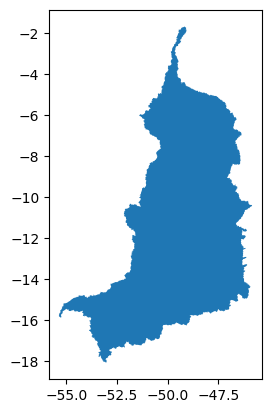

In [18]:
# open the shapefile of tocantins
shp = gpd.read_file('/workspaces/reports_folder/bases/bacias_interesse/bacia_Tocantins.shp')
shp.plot()


In [19]:
cube

<xarray.DataArray 'monthacum' (time: 20, latitude: 924, longitude: 1001)>
array([[[ 44.9375,  95.9375, 102.125 , ...,   0.    ,   0.    ,
           0.    ],
        [ 99.5625,  94.125 ,  93.625 , ...,  90.8125,  87.4375,
          83.1875],
        [104.125 ,  98.9375,  92.375 , ...,  90.125 ,  87.8125,
          82.875 ],
        ...,
        [ 11.8125,  14.3125,  14.25  , ...,   1.    ,   0.875 ,
           1.3125],
        [ 11.5625,  14.6875,  17.    , ...,   2.5625,   1.9375,
           1.375 ],
        [ 43.25  ,  11.5   ,  12.3125, ...,   2.3125,   2.875 ,
           1.75  ]],

       [[ 36.0625,  89.6875,  91.75  , ...,  45.4375,  43.4375,
          43.3125],
        [ 88.3125,  85.875 ,  88.    , ..., 115.5625, 122.9375,
         127.125 ],
        [ 88.125 ,  86.1875,  85.375 , ..., 129.125 , 129.9375,
         130.375 ],
...
        [  1.3125,   1.5625,   1.4375, ...,  20.875 ,  17.5   ,
          18.375 ],
        [  1.75  ,   1.8125,   1.6875, ...,  22.    ,  20.    ,
          17.875 ],
        [  2.1875,   1.9375,   1.9375, ...,  23.    ,  20.875 ,
          20.375 ]],

       [[ 92.375 , 134.1875, 127.875 , ...,  74.9375,  76.625 ,
          79.5625],
        [136.125 , 122.8125, 124.5   , ...,  82.0625,  82.125 ,
          82.125 ],
        [129.5   , 126.375 , 122.625 , ...,  82.75  ,  79.75  ,
          85.25  ],
        ...,
        [  5.75  ,   5.125 ,   4.875 , ...,  14.5   ,  11.8125,
          12.875 ],
        [  4.375 ,   4.125 ,   2.875 , ...,  15.125 ,  15.9375,
          17.5   ],
        [  3.875 ,   3.75  ,   3.    , ...,  20.25  ,  19.4375,
          20.0625]]], dtype=float32)
Coordinates:
    step         timedelta64[ns] 00:00:00
    surface      float64 0.0
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2021-10-01T12:00:00 ... 2023-05-01T12:...

In [20]:
# perform the cutting
shp_cube = Downloader.cut_cube_by_geoms(cube, shp.geometry)

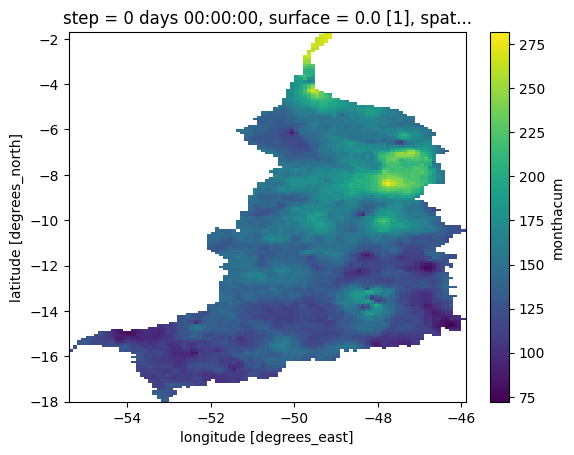

In [21]:
shp_cube.mean(dim='time').plot()

## Get the time series

If instead, we want to calculate a time series, we can just use another helper function called `get_time_series` that will apply an aggregation function to latitude and longitude and return a Pandas TimeSeries.

In [22]:
ts = Downloader.get_time_series(
    cube=cube,
    shp=shp,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

Text(0, 0.5, 'Monthly rain in mm')

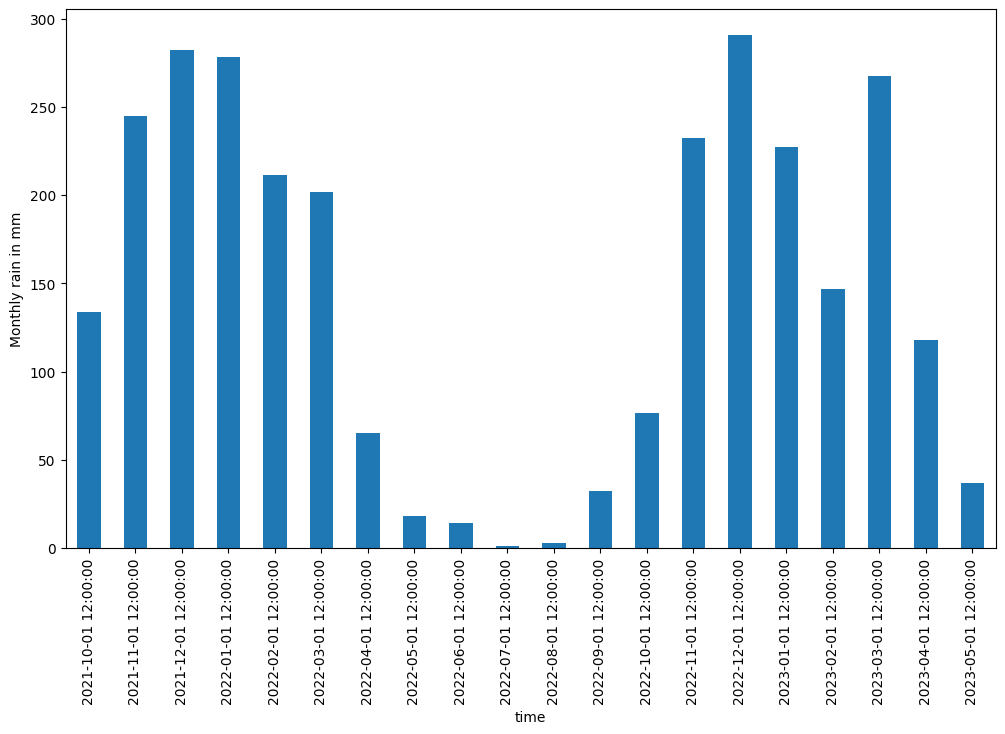

In [23]:
ax = ts.plot(kind='bar', figsize=(12, 7))
ax.set_ylabel('Monthly rain in mm')

In [24]:
ts

time
2021-10-01 12:00:00    133.772751
2021-11-01 12:00:00    244.730026
2021-12-01 12:00:00    281.983398
2022-01-01 12:00:00    278.165100
2022-02-01 12:00:00    211.294968
2022-03-01 12:00:00    201.833099
2022-04-01 12:00:00     65.399223
2022-05-01 12:00:00     18.274775
2022-06-01 12:00:00     14.404236
2022-07-01 12:00:00      1.259051
2022-08-01 12:00:00      3.139279
2022-09-01 12:00:00     32.563808
2022-10-01 12:00:00     76.782280
2022-11-01 12:00:00    232.470566
2022-12-01 12:00:00    290.722382
2023-01-01 12:00:00    227.465179
2023-02-01 12:00:00    146.820755
2023-03-01 12:00:00    267.639313
2023-04-01 12:00:00    117.819420
2023-05-01 12:00:00     37.029060
Name: monthacum, dtype: float32

In [25]:
ts.to_csv('../tmp/tocantins_chuva_mensal.csv')

## Monthly Average

In [28]:
# Create a cube of monthly rain
cube = downloader.create_cube(
    start_date='2000-01',
    end_date='2000-12',
    datatype=INPETypes.MONTHLY_ACCUM
)

In [29]:
avg_ts = Downloader.get_time_series(
    cube=cube,
    shp=shp,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

Text(24.000000000000007, 0.5, 'Long Term Average (LTA) monthly rain in mm')

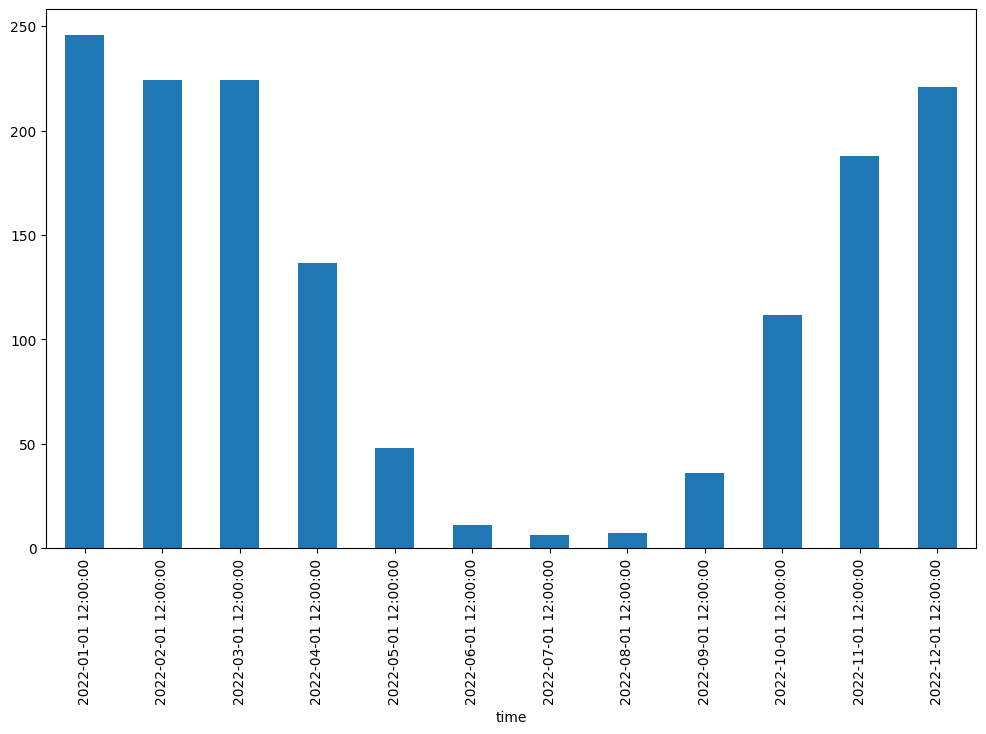

In [32]:
avg_ts.plot(kind='bar', figsize=(12, 7))
ax.set_ylabel('Long Term Average (LTA) monthly rain in mm')

In [33]:
avg_ts.to_csv('../tmp/tocantins_chuva_media.csv')

## Year Accumulated

Another data that is available at INPE is the rain accumulated in a year.
This is done by accumulating the rain every day, like so:<br>
MERGE_CPTEC_acum_2022.nc=(prec_01jan2022+...+prec_31dec2022)

In [10]:
cube = downloader.create_cube(
    start_date='2001',
    end_date='2022',
    datatype=INPETypes.YEARLY_ACCUM
)
cube

<xarray.DataArray 'pacum' (time: 22, latitude: 691, longitude: 474)>
array([[[1768.9375, 1753.4375, 1751.3125, ...,  738.875 ,  724.875 ,
          724.3125],
        [1786.875 , 1749.9375, 1760.9375, ...,  744.1875,  748.3125,
          731.8125],
        [1799.25  , 1787.8125, 1777.6875, ...,  760.125 ,  765.75  ,
          759.625 ],
        ...,
        [2406.625 , 2218.625 , 2036.375 , ..., 1100.875 , 1028.25  ,
          977.5   ],
        [2490.625 , 2310.3125, 2163.125 , ..., 1027.75  ,  965.    ,
          885.875 ],
        [2524.1875, 2371.625 , 2168.875 , ..., 1014.75  ,  938.375 ,
          896.125 ]],

       [[1431.1875, 1435.9375, 1460.6875, ...,  696.4375,  706.1875,
          723.0625],
        [1460.875 , 1466.5   , 1462.125 , ...,  694.1875,  697.25  ,
          709.6875],
        [1483.8125, 1486.0625, 1456.0625, ...,  686.1875,  694.0625,
          708.0625],
...
        [1395.375 , 1309.875 , 1315.3125, ...,  581.6875,  593.0625,
          586.8125],
        [1372.9375, 1287.0625, 1236.375 , ...,  571.25  ,  557.3125,
          580.5625],
        [1351.1875, 1213.0625, 1161.625 , ...,  546.875 ,  556.    ,
          568.1875]],

       [[1651.    , 1661.125 , 1661.375 , ..., 1174.1875, 1165.1875,
         1154.5625],
        [1672.125 , 1662.625 , 1671.0625, ..., 1161.4375, 1173.625 ,
         1137.9375],
        [1659.875 , 1670.0625, 1674.0625, ..., 1168.375 , 1141.6875,
         1125.0625],
        ...,
        [2714.0625, 2729.75  , 2668.75  , ...,  811.0625,  808.875 ,
          834.625 ],
        [2768.4375, 2714.25  , 2592.75  , ...,  707.5   ,  767.4375,
          787.625 ],
        [2712.    , 2646.0625, 2579.625 , ...,  612.25  ,  641.125 ,
          668.6875]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
  * time         (time) datetime64[ns] 2001-01-01 2002-01-01 ... 2022-01-01
    spatial_ref  int64 0

In [11]:
cube.rio.crs

CRS.from_epsg(4326)

In [12]:
ts = Downloader.get_time_series(
    cube=cube,
    shp=brazil,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

(1200.0, 1800.0)

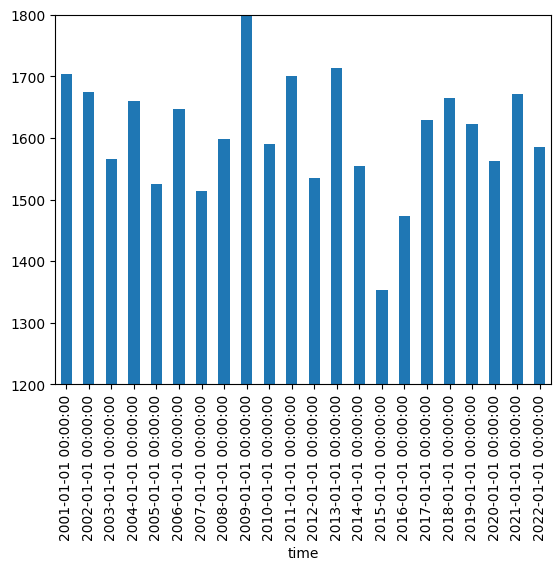

In [13]:
ax = ts.plot(kind='bar')
ax.set_ylim([1200, 1800])

## Yearly rain adjusted by the Hydrological period

One important information is regarding the rain within a hydrological period, that can change depending on the basin to be considered. For that, we are going to rely on the MONTHLY_ACCUM_YEARLY and create the rain in the Hydrological year <b>on-demand</b>.

The fundamental method that will be used to perform this task is the `accum_rain()`.

In [24]:
rain1 = downloader.accum_rain(
    start_date='2022-01',
    end_date='2022-03',
    datatype=INPETypes.MONTHLY_ACCUM_YEARLY,
)


In [25]:
rain1

<xarray.DataArray 'pacum' (latitude: 691, longitude: 474)>
array([[521.3125, 523.25  , 528.6875, ..., 272.75  , 267.5625, 262.6875],
       [520.8125, 514.375 , 522.375 , ..., 276.6875, 273.6875, 261.25  ],
       [511.    , 514.4375, 530.1875, ..., 293.5   , 275.    , 277.    ],
       ...,
       [ 82.75  ,  85.875 ,  78.5625, ...,  58.3125,  56.0625,  53.4375],
       [ 84.125 ,  86.125 ,  82.375 , ...,  56.4375,  51.5625,  46.75  ],
       [ 96.875 ,  87.75  ,  78.75  , ...,  55.4375,  54.4375,  44.8125]],
      dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
    spatial_ref  int64 0
    time         datetime64[ns] 2022-01-01T12:00:00

Now, to accumulate it in customized periods, we can pass all the periods as tuples (start, end) in a list. Each period will be accumulated and they will be concatenated to create a cube. 

In [26]:
periods = [('2022-01','2022-03'), ('2022-04','2022-06')]
cube = downloader.accum_periodically_rain(
    periods = periods,
    data_type=INPETypes.MONTHLY_ACCUM_YEARLY
)

In [27]:
cube

<xarray.DataArray 'pacum' (time: 2, latitude: 691, longitude: 474)>
array([[[ 521.3125,  523.25  ,  528.6875, ...,  272.75  ,  267.5625,
          262.6875],
        [ 520.8125,  514.375 ,  522.375 , ...,  276.6875,  273.6875,
          261.25  ],
        [ 511.    ,  514.4375,  530.1875, ...,  293.5   ,  275.    ,
          277.    ],
        ...,
        [  82.75  ,   85.875 ,   78.5625, ...,   58.3125,   56.0625,
           53.4375],
        [  84.125 ,   86.125 ,   82.375 , ...,   56.4375,   51.5625,
           46.75  ],
        [  96.875 ,   87.75  ,   78.75  , ...,   55.4375,   54.4375,
           44.8125]],

       [[ 421.625 ,  428.25  ,  433.3125, ...,  293.    ,  294.5625,
          297.1875],
        [ 440.0625,  438.875 ,  440.5   , ...,  290.875 ,  300.3125,
          296.5   ],
        [ 432.625 ,  448.625 ,  451.9375, ...,  283.4375,  286.5   ,
          279.5625],
        ...,
        [1101.6875, 1129.5   , 1114.125 , ...,   15.    ,   15.125 ,
           16.4375],
        [1170.75  , 1163.1875, 1133.1875, ...,   13.75  ,   14.625 ,
           15.125 ],
        [1114.375 , 1079.    , 1075.6875, ...,    9.    ,    8.75  ,
           10.375 ]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2022-01-01T12:00:00 2022-04-01T12:00:00

To create the periods automatically, we can use the DateProcessor, like so:

In [28]:
from raindownloader.utils import DateProcessor

# Yearly example
DateProcessor.create_monthly_periods(
    start_date = '2012-10-01',
    end_date = '2022-10-01',
    month_step = 12,
)

[(datetime.datetime(2012, 10, 1, 0, 0), datetime.datetime(2013, 9, 1, 0, 0)),
 (datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2014, 9, 1, 0, 0)),
 (datetime.datetime(2014, 10, 1, 0, 0), datetime.datetime(2015, 9, 1, 0, 0)),
 (datetime.datetime(2015, 10, 1, 0, 0), datetime.datetime(2016, 9, 1, 0, 0)),
 (datetime.datetime(2016, 10, 1, 0, 0), datetime.datetime(2017, 9, 1, 0, 0)),
 (datetime.datetime(2017, 10, 1, 0, 0), datetime.datetime(2018, 9, 1, 0, 0)),
 (datetime.datetime(2018, 10, 1, 0, 0), datetime.datetime(2019, 9, 1, 0, 0)),
 (datetime.datetime(2019, 10, 1, 0, 0), datetime.datetime(2020, 9, 1, 0, 0)),
 (datetime.datetime(2020, 10, 1, 0, 0), datetime.datetime(2021, 9, 1, 0, 0)),
 (datetime.datetime(2021, 10, 1, 0, 0), datetime.datetime(2022, 9, 1, 0, 0))]

In [29]:
# By semesters
DateProcessor.create_monthly_periods(
    start_date = '2012-10',
    end_date = '2013-10',
    month_step = 6,
)

[(datetime.datetime(2012, 10, 5, 0, 0), datetime.datetime(2013, 3, 5, 0, 0)),
 (datetime.datetime(2013, 4, 5, 0, 0), datetime.datetime(2013, 9, 5, 0, 0))]

In [30]:
# Quarterly
DateProcessor.create_monthly_periods(
    start_date = '2012-01',
    end_date = '2012-12',
    month_step = 3,
)

[(datetime.datetime(2012, 1, 5, 0, 0), datetime.datetime(2012, 3, 5, 0, 0)),
 (datetime.datetime(2012, 4, 5, 0, 0), datetime.datetime(2012, 6, 5, 0, 0)),
 (datetime.datetime(2012, 7, 5, 0, 0), datetime.datetime(2012, 9, 5, 0, 0)),
 (datetime.datetime(2012, 10, 5, 0, 0), datetime.datetime(2012, 12, 5, 0, 0))]

Now, accumulating it for every year...


In [31]:
periods = DateProcessor.create_monthly_periods(
    start_date = '2001-10',
    end_date = '2022-10',
    month_step = 12,
)

In [32]:
cube = downloader.accum_periodically_rain(
    periods=periods,
    data_type=INPETypes.MONTHLY_ACCUM_YEARLY
)

In [33]:
ts = Downloader.get_time_series(
    cube=cube,
    shp=brazil,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

(1200.0, 1800.0)

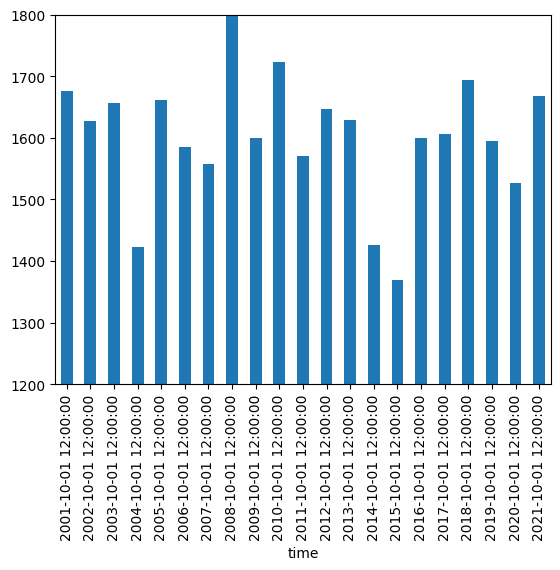

In [34]:
ax = ts.plot(kind='bar')
ax.set_ylim([1200, 1800])